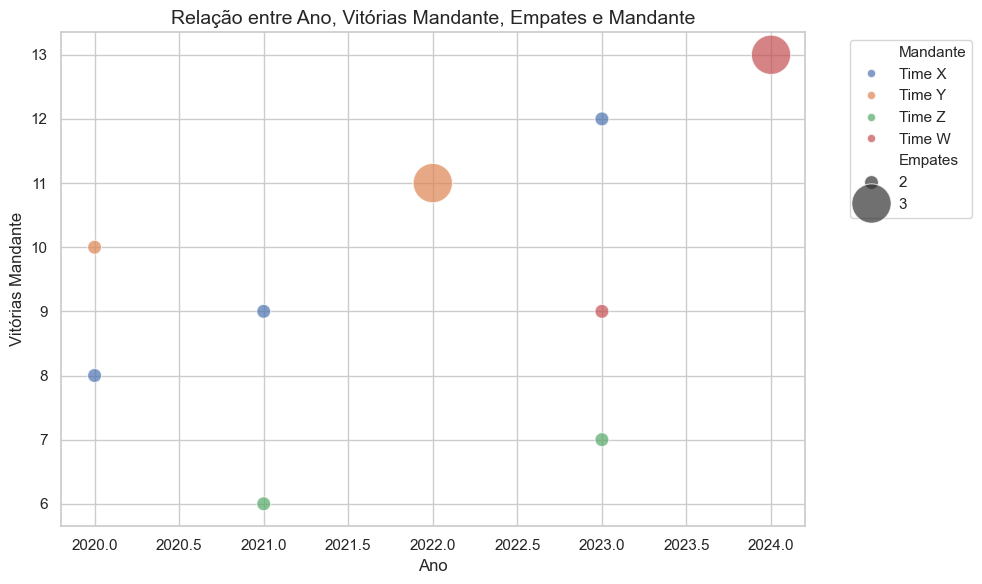

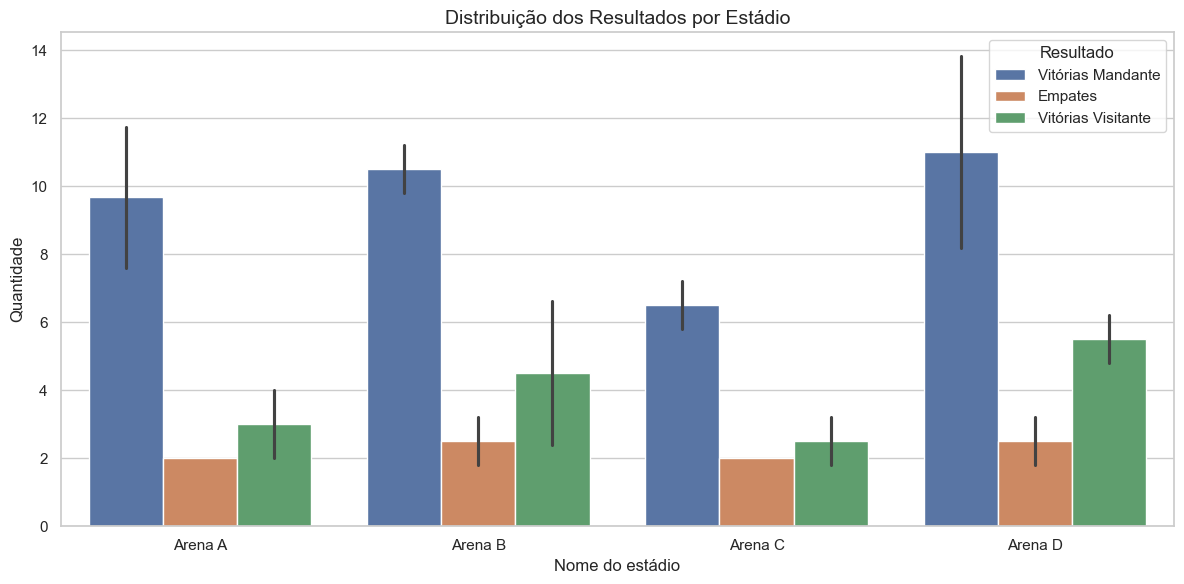

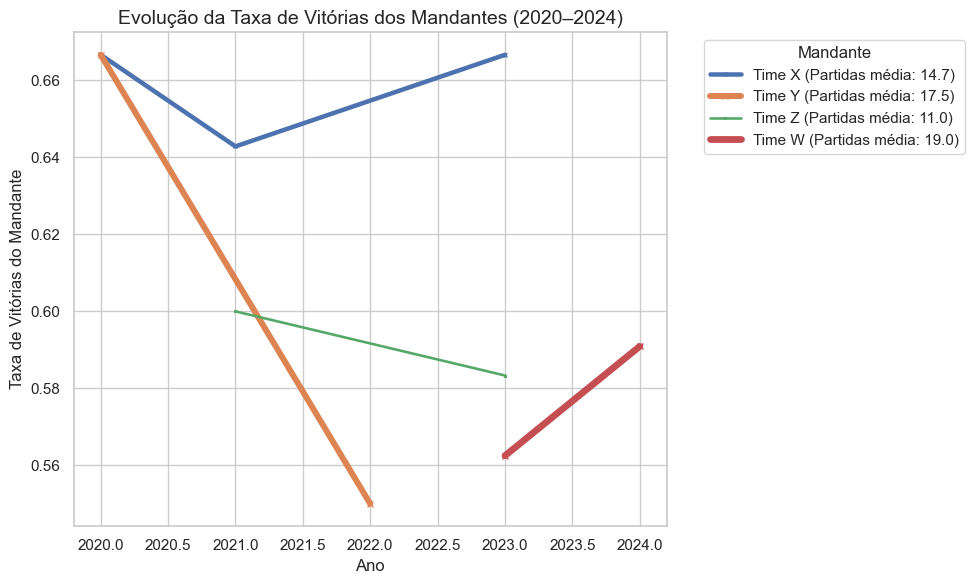

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# Exemplo de DataFrame
# =====================
data = {
    "Nome do estádio": ["Arena A", "Arena B", "Arena A", "Arena C", "Arena B", "Arena A", "Arena C", "Arena D", "Arena D"],
    "Ano": [2020, 2020, 2021, 2021, 2022, 2023, 2023, 2024, 2023],
    "Mandante": ["Time X", "Time Y", "Time X", "Time Z", "Time Y", "Time X", "Time Z", "Time W", "Time W"],
    "Partidas": [12, 15, 14, 10, 20, 18, 12, 22, 16],
    "Vitórias Mandante": [8, 10, 9, 6, 11, 12, 7, 13, 9],
    "Vitórias Visitante": [2, 3, 3, 2, 6, 4, 3, 6, 5],
    "Empates": [2, 2, 2, 2, 3, 2, 2, 3, 2]
}

df = pd.DataFrame(data)

# Tema geral bonito
sns.set_theme(style="whitegrid")

# ==================================================
# 1️⃣ Gráfico de bolhas (4 variáveis)
# ==================================================
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Ano",
    y="Vitórias Mandante",
    size="Empates",
    hue="Mandante",
    alpha=0.7,
    sizes=(100, 800)
)
plt.title("Relação entre Ano, Vitórias Mandante, Empates e Mandante", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ==================================================
# 2️⃣ Barras empilhadas por estádio e ano (4 variáveis)
# ==================================================
# Precisamos transformar em formato longo
df_long = df.melt(
    id_vars=["Nome do estádio", "Ano"],
    value_vars=["Vitórias Mandante", "Empates", "Vitórias Visitante"],
    var_name="Resultado",
    value_name="Quantidade"
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_long,
    x="Nome do estádio",
    y="Quantidade",
    hue="Resultado",
    errorbar="sd"
)
plt.title("Distribuição dos Resultados por Estádio", fontsize=14)
plt.tight_layout()
plt.show()

# ==================================================
# 3️⃣ Linha temporal: desempenho de mandantes ao longo do tempo (4 variáveis)
# ==================================================
df["Taxa vitória mandante"] = df["Vitórias Mandante"] / df["Partidas"]

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Normalizar espessura da linha conforme número de partidas
min_size, max_size = 1.5, 6
sizes = (df["Partidas"] - df["Partidas"].min()) / (df["Partidas"].max() - df["Partidas"].min())
sizes = sizes * (max_size - min_size) + min_size

# Plotar uma linha por mandante
for mandante in df["Mandante"].unique():
    subset = df[df["Mandante"] == mandante].sort_values("Ano")
    plt.plot(
        subset["Ano"],
        subset["Taxa vitória mandante"],
        label=f"{mandante} (Partidas média: {subset['Partidas'].mean():.1f})",
        linewidth=sizes[subset.index].mean(),  # espessura representando partidas
        marker="x",
        markersize=sizes[subset.index].mean()
    )

plt.title("Evolução da Taxa de Vitórias dos Mandantes (2020–2024)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Taxa de Vitórias do Mandante")
plt.legend(title="Mandante", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


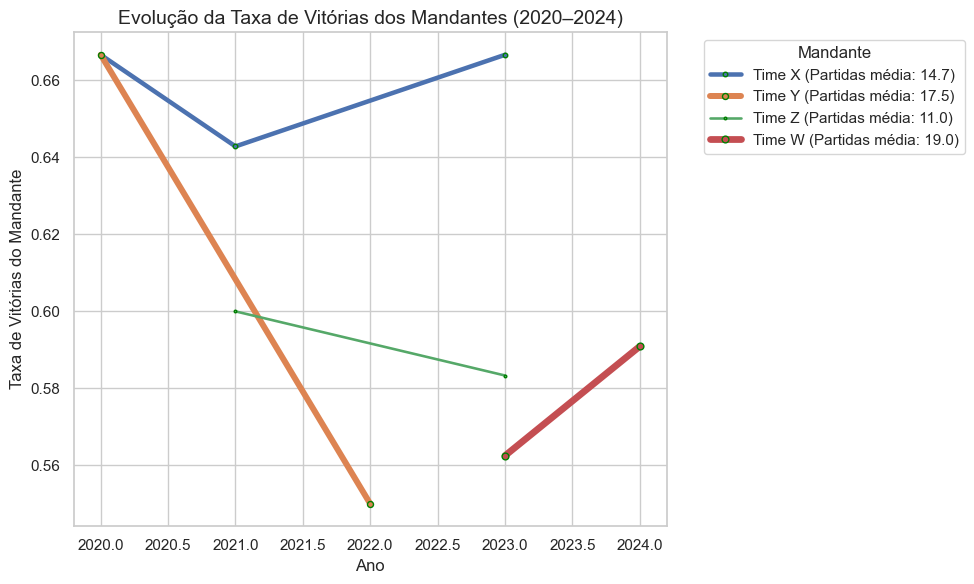

In [9]:
# ==================================================
# 3️⃣ Linha temporal: desempenho de mandantes ao longo do tempo (4 variáveis)
# ==================================================
df["Taxa vitória mandante"] = df["Vitórias Mandante"] / df["Partidas"]

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Normalizar espessura da linha conforme número de partidas
min_size, max_size = 1.5, 6
sizes = (df["Partidas"] - df["Partidas"].min()) / (df["Partidas"].max() - df["Partidas"].min())
sizes = sizes * (max_size - min_size) + min_size

# Plotar uma linha por mandante
for mandante in df["Mandante"].unique():
    subset = df[df["Mandante"] == mandante].sort_values("Ano")
    plt.plot(
        subset["Ano"],
        subset["Taxa vitória mandante"],
        label=f"{mandante} (Partidas média: {subset['Partidas'].mean():.1f})",
        linewidth=sizes[subset.index].mean(),  # espessura representando partidas
        marker="o",
        markersize=sizes[subset.index].mean(),
        markeredgecolor='green' if subset["Vitórias Mandante"].iloc[0] > subset["Vitórias Visitante"].iloc[0] else 'black'  # Destaque para Time X
    )

plt.title("Evolução da Taxa de Vitórias dos Mandantes (2020–2024)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Taxa de Vitórias do Mandante")
plt.legend(title="Mandante", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

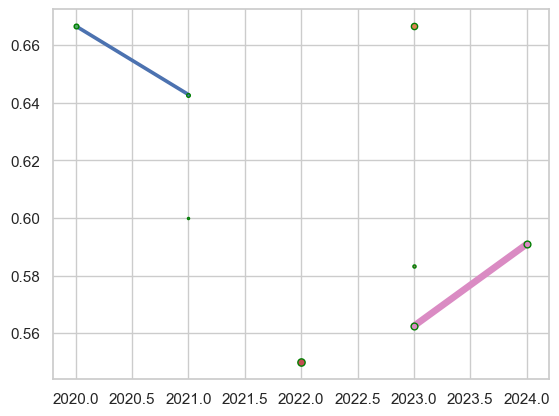

In [10]:
# ...existing code...
# Plotar uma linha por mandante — liga apenas anos consecutivos
for mandante in df["Mandante"].unique():
    subset = df[df["Mandante"] == mandante].sort_values("Ano").copy()

    gaps = subset["Ano"].diff().fillna(1)
    blocks = (gaps != 1).cumsum()

    edge = 'green' if subset["Vitórias Mandante"].iloc[0] > subset["Vitórias Visitante"].iloc[0] else 'black'

    added_label = False
    for _, seg in subset.groupby(blocks):
        idx = seg.index
        plt.plot(
            seg["Ano"],
            seg["Taxa vitória mandante"],
            label=f"{mandante} (Partidas média: {subset['Partidas'].mean():.1f})" if not added_label else None,
            linewidth=sizes.loc[idx].mean(),
            marker="o",
            markersize=sizes.loc[idx].mean(),
            markeredgecolor=edge
        )
        added_label = True
# ...existing code...

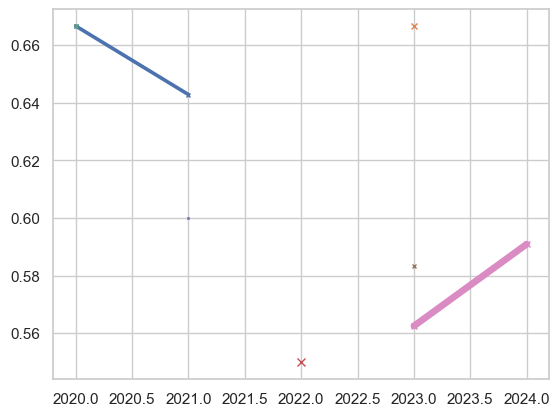

In [11]:
# ...existing code...
# Plotar uma linha por mandante — liga apenas anos consecutivos
for mandante in df["Mandante"].unique():
    subset = df[df["Mandante"] == mandante].sort_values("Ano").copy()

    gaps = subset["Ano"].diff().fillna(1)
    blocks = (gaps != 1).cumsum()  # nova série de blocos quando não for ano subsequente

    added_label = False
    for _, seg in subset.groupby(blocks):
        idx = seg.index
        plt.plot(
            seg["Ano"],
            seg["Taxa vitória mandante"],
            label=f"{mandante} (Partidas média: {subset['Partidas'].mean():.1f})" if not added_label else None,
            linewidth=sizes.loc[idx].mean(),
            marker="x",
            markersize=sizes.loc[idx].mean(),
        )
        added_label = True
# ...existing code...